In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

In [4]:
N=1000
x1=np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x2 + x1
X=np.array([x1,x2,x3])
#print(X)
cov = np.cov(X)
l, V = la.eig(np.cov(X))



In [10]:
U, spectrum, Vt = la.svd(X)
l_svd = (spectrum**2)/(N-1)
V_svd = U
print('eigenvalues:\n',l)
print('eigenvalues using svd:\n',l_svd)
print('eigenvectors:\n',V)
print('eigenvectors using svd:\n',V_svd)


eigenvalues:
 [5.59203104e+01+0.j 1.00204471e+00+0.j 8.51906193e-16+0.j]
eigenvalues using svd:
 [5.60720209e+01 1.00225172e+00 2.77487424e-29]
eigenvectors:
 [[-0.05749887 -0.91105829 -0.40824829]
 [-0.42332604  0.39259189 -0.81649658]
 [-0.90415095 -0.12587451  0.40824829]]
eigenvectors using svd:
 [[-0.05759171  0.91105243 -0.40824829]
 [-0.42328603 -0.39263503 -0.81649658]
 [-0.90416377  0.12578237  0.40824829]]


In [12]:
m, n = U.shape[0], Vt.shape[0]
D = np.zeros((m, n))
for i in range(min(n, 3)):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt))
if np.allclose(SVD, X):
    print('Two arrays are element-wise equal within a tolerance')
else:
    print('there are no matches')

    

Two arrays are element-wise equal within a tolerance


In [43]:
percent = np.real(np.sum(l[:2])/np.sum(l))
print('Total variability is {} %  '.format(percent*100))
      

Total variability is 100.0 %  


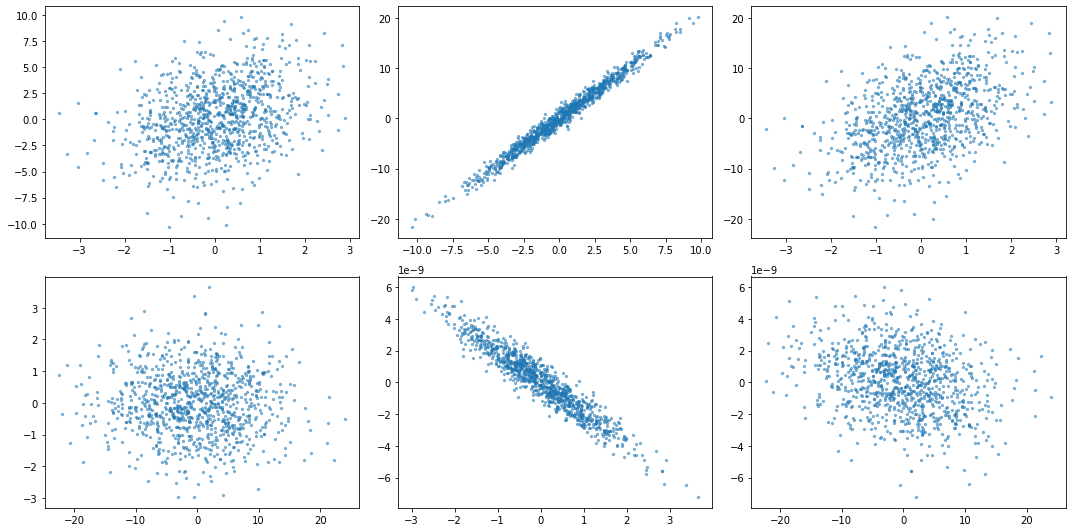

In [31]:

x_new = np.dot(V.T,X)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 7.5))
axs[0,0].scatter(X[0],X[1], s=5, alpha=0.5)
axs[0,1].scatter(X[1],X[2], s=5, alpha=0.5)
axs[0,2].scatter(X[0],X[2], s=5, alpha=0.5)

axs[1,0].scatter(x_new[0],x_new[1], s=5, alpha=0.5)
axs[1,1].scatter(x_new[1],x_new[2], s=5, alpha=0.5)
axs[1,2].scatter(x_new[0],x_new[2], s=5, alpha=0.5)
plt.tight_layout()
plt.show()

In [44]:
noise = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = X + np.sum(noise, axis = 2)
cov2 = np.cov(x_noise)
l2, V2 = la.eig(cov2)
print('Eigenvalues with Eigen-decomposition:\n',l2)
print('Eigenvectors with Eigen-decomposition:\n', V2)
U2, spectrum2, Vt2 = la.svd(cov2)
print('Eigenvalues with SVD:\n',spectrum2[[0,2,1]])
print('Eigenvectors with SVD:\n', Vt2.T[:,[0,2,1]])

Eigenvalues with Eigen-decomposition:
 [5.58850387e+01+0.j 1.00697444e+00+0.j 3.97714198e-03+0.j]
Eigenvectors with Eigen-decomposition:
 [[-0.05766714 -0.9113544  -0.40756307]
 [-0.42338843  0.39203725 -0.8167307 ]
 [-0.90411102 -0.12545897  0.40846457]]
Eigenvalues with SVD:
 [5.58850387e+01 3.97714198e-03 1.00697444e+00]
Eigenvectors with SVD:
 [[-0.05766714 -0.40756307  0.9113544 ]
 [-0.42338843 -0.8167307  -0.39203725]
 [-0.90411102  0.40846457  0.12545897]]


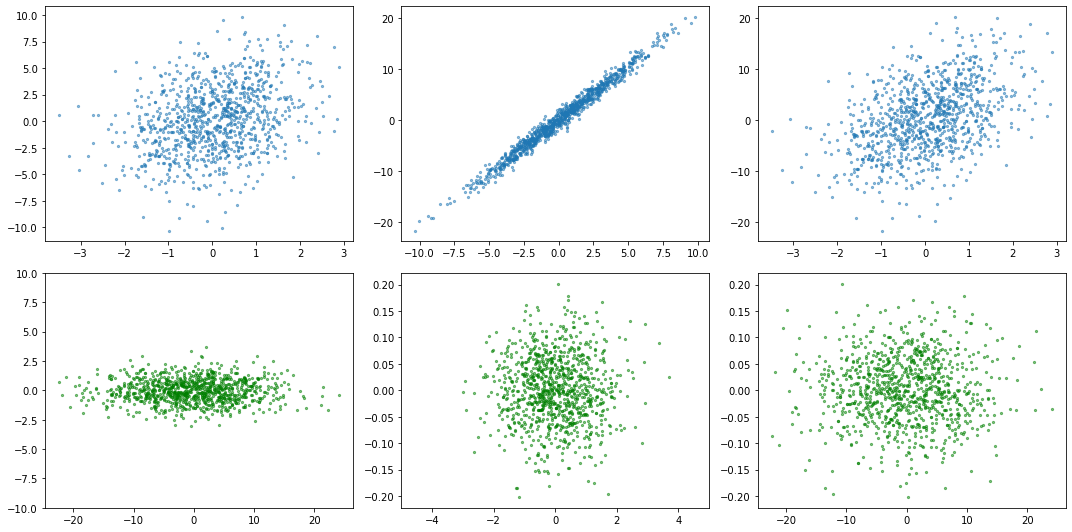

In [42]:
x_new = np.dot(V2.T,x_noise)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 7.5))
axs[0,0].scatter(x_noise[0],x_noise[1], s=5, alpha=0.5)
axs[0,1].scatter(x_noise[1],x_noise[2], s=5, alpha=0.5)
axs[0,2].scatter(x_noise[0],x_noise[2], s=5, alpha=0.5)
axs[1,0].scatter(x_new[0],x_new[1],c='g', s=5, alpha=0.5)
axs[1,0].set_ylim(-10,10)
axs[1,1].scatter(x_new[1],x_new[2],c='g', s=5, alpha=0.5)
axs[1,1].set_xlim(-5,5)
axs[1,2].scatter(x_new[0],x_new[2], c='g',s=5, alpha=0.5)
plt.tight_layout()
plt.show()